# **MLP Architectures on MNIST Dataset**

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist

import seaborn as sns

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal
from keras.initializers import he_normal

from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, fig):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [82]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [84]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [86]:
# here we are having a class number for each image
print("Class label of sixth image :", y_train[5])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[5])

Class label of sixth image : 2
After converting the output into a vector :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 120 
nb_epoch = 20

### **MLP + RELU + ADAM**

**2-Layer Architecture **

In [119]:
model_relu = Sequential()

model_relu.add(Dense(264, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))



print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 264)               207240    
_________________________________________________________________
dropout_49 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                16960     
_________________________________________________________________
batch_normalization_23 (Batc (None, 64)                256       
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                650       
Total params: 225,106
Trainable params: 224,978
Non-trainable params: 128
_________________________________________________________________
No

Test score: 0.06599829901985359
Test accuracy: 0.9818


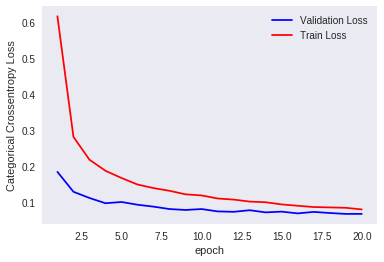

In [120]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

**3 Layer Architecture**

In [0]:
model_relu = Sequential()

model_relu.add(Dense(458, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))



#print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

Test score: 0.06503238941127201
Test accuracy: 0.9837


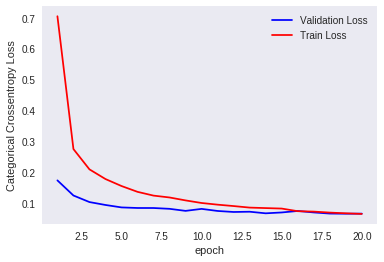

In [122]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

**5 Layer Architecture**

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))



#print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

Test score: 0.08667265413741115
Test accuracy: 0.9808


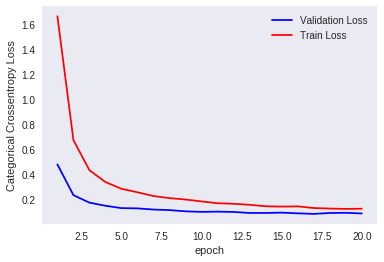

In [124]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax, fig)

### Conclusion

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture","Test score","Test accuracy"]

x.add_row(["2 Layer",0.065,0.98])
x.add_row(["3 Layer",0.065,0.9837])
x.add_row(["5 Layer",0.0866,0.9808])

print(x)

+--------------+------------+---------------+
| Architecture | Test score | Test accuracy |
+--------------+------------+---------------+
|   2 Layer    |   0.065    |      0.98     |
|   3 Layer    |   0.065    |     0.9837    |
|   5 Layer    |   0.0866   |     0.9808    |
+--------------+------------+---------------+
